# Exploration of Transshipment Data

The following is an example of an exploration of our transshipment data.

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib import colors,colorbar
import pandas as pd
import math

In [2]:
# First, let's map potential transshipments

df = pd.DataFrame.from_csv('GFW_transshipment_data_20170222/potential_transshipments_20170222.csv')

In [3]:
df.head()

,latitude,longitude,event_start_time,duration_hrs,flag_iso3
mmsi,,,,,
311296000,27.156422,-52.223976,2014-03-04 00:00:15 UTC,11.762778,BHS
311296000,45.204567,-19.603624,2014-01-17 15:35:18 UTC,9.575278,BHS
311296000,29.027460,-49.028973,2015-05-04 12:11:15 UTC,12.350833,BHS
311296000,19.308685,-64.971237,2016-01-16 07:45:06 UTC,8.321111,BHS
311296000,27.156422,-52.223976,2014-03-04 00:00:15 UTC,11.762778,BHS


In [4]:
min_lat = -85
max_lat = 85
min_lon = -180
max_lon = 180

firstlon, lastlat, lastlon, firstlat = min_lon,min_lat,max_lon,max_lat

one_over_cellsize = 4
cellsize = .25

numlats = int((max_lat-min_lat)*one_over_cellsize)
numlons = int((max_lon-min_lon)*one_over_cellsize)

In [5]:
def get_area(lat):
    '''This function converts square degrees to square kilometers. 
    It is not exact, but it is close enough.'''
    lat_degree = 69 # miles
    # Convert latitude and longitude to 
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0        
    # phi = 90 - latitude
    phi = (math.fabs(lat)+cellsize/2.)*degrees_to_radians #plus half a cell size to get the middle
    lon_degree = math.cos(phi)*lat_degree 
    return  lat_degree*lon_degree* 2.59 # square miles to square km

In [6]:
grid = np.zeros(shape=(numlats,numlons))

# There are more efficient ways to do this
for index, row in df.iterrows():
    lat = int(math.floor(row['latitude']*one_over_cellsize))
    lon = int(math.floor(row['longitude']*one_over_cellsize))
    lat_index = lat-min_lat*one_over_cellsize 
    lon_index = lon-min_lon*one_over_cellsize
    area = get_area(lat*cellsize)*cellsize*cellsize # lat*cellsize is the latitude, 
    try:
        grid[lat_index][lon_index] += float(row['duration_hrs'])/area #/770
    except:
        pass

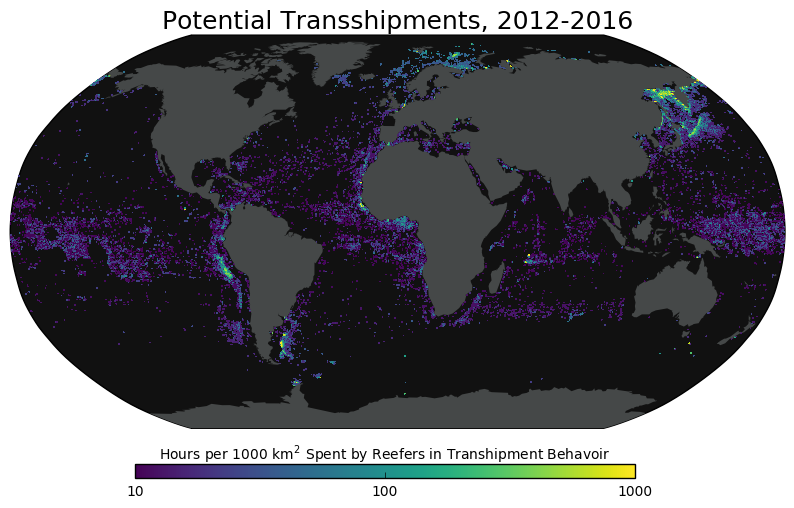

In [7]:
plt.rcParams["figure.figsize"] = [10,7]

title = "Potential Transshipments, 2012-2016"

fig = plt.figure()

fig_min_value = 10
fig_max_value = 1000
x = np.linspace(firstlon, lastlon, -(firstlon-lastlon)*one_over_cellsize+1)
y = np.linspace(lastlat, firstlat, (firstlat-lastlat)*one_over_cellsize+1)
x, y = np.meshgrid(x, y)
lat_boxes = np.linspace(lastlat,firstlat,num=numlats,endpoint=False)
lon_boxes = np.linspace(firstlon,lastlon,num=numlons,endpoint=False)

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawmapboundary(fill_color='#111111')
cont_color = '#454848'
m.fillcontinents(cont_color,lake_color=cont_color )

converted_x, converted_y = m(x, y)
norm = colors.LogNorm(vmin=fig_min_value, vmax=fig_max_value)
m.pcolormesh(converted_x, converted_y, grid*1000, norm=norm, vmin=fig_min_value,
             vmax=fig_max_value, cmap = plt.get_cmap('viridis'))
plt.title(title, color = "#000000", fontsize=18)

# legend
ax = fig.add_axes([0.25, 0.16, 0.5, 0.02]) 
norm = colors.LogNorm(vmin=fig_min_value, vmax=fig_max_value)
lvls = np.logspace(np.log10(fig_min_value),np.log10(fig_max_value),num=3)
cb = colorbar.ColorbarBase(ax,norm = norm, orientation='horizontal',ticks=lvls, 
                           cmap = plt.get_cmap('viridis')) 
cb.ax.set_xticklabels([int(i) for i in lvls], fontsize=10, color = "#000000")
cb.set_label('Hours per 1000 $\mathregular{km^{2}}$ Spent by Reefers in Transhipment Behavoir',
             labelpad=-40, y=0.45, color = "#000000")
plt.savefig('potential_transshipments.png',bbox_inches='tight',dpi=300,transparent=True,pad_inches=0)
plt.show()

In [8]:
# How many Likely Transshipments?
df = pd.DataFrame.from_csv('GFW_transshipment_data_20170222/likely_transshipments_20170222.csv')

In [9]:
df.head()

,fishing_mmsi,latitude,longitude,event_start_time,event_end_time,reefer_flag_iso3,fishing_flag_iso3
reefer_mmsi,,,,,,,
312862000,312060000,9.117798,-14.113248,2013-01-21 10:50:00,2013-01-24 23:10:00,BLZ,BLZ
357805000,312055000,40.514701,150.557884,2014-11-05 09:10:00,2014-11-05 12:20:00,PAN,BLZ
312887000,312055000,-42.162510,-57.348868,2014-05-17 21:50:00,2014-05-18 01:50:00,BLZ,BLZ
354240000,412679190,-20.272755,-79.242633,2016-12-11 14:50:00,2016-12-11 19:50:00,PAN,CHN
354240000,412331091,-19.677783,-79.685557,2016-12-12 13:20:00,2016-12-13 10:00:00,PAN,CHN


In [10]:
grid = np.zeros(shape=(numlats,numlons))

# There are more efficient ways to do this
for index, row in df.iterrows():
    lat = int(math.floor(row['latitude']*one_over_cellsize))
    lon = int(math.floor(row['longitude']*one_over_cellsize))
    lat_index = lat-min_lat*one_over_cellsize 
    lon_index = lon-min_lon*one_over_cellsize
    area = get_area(lat*cellsize)*cellsize*cellsize # lat*cellsize is the latitude, 
    try:
        grid[lat_index][lon_index] += 1./area #/770
    except:
        pass

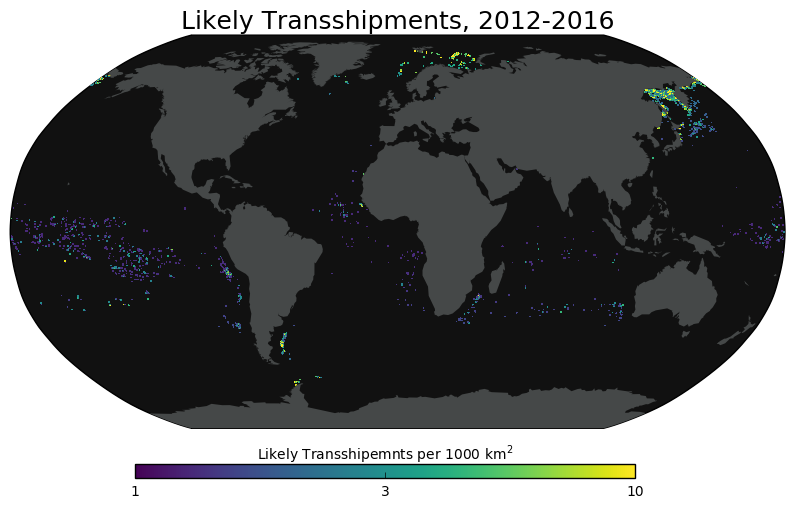

In [11]:
plt.rcParams["figure.figsize"] = [10,7]

title = "Likely Transshipments, 2012-2016"

fig = plt.figure()

fig_min_value = 1
fig_max_value = 10
x = np.linspace(firstlon, lastlon, -(firstlon-lastlon)*one_over_cellsize+1)
y = np.linspace(lastlat, firstlat, (firstlat-lastlat)*one_over_cellsize+1)
x, y = np.meshgrid(x, y)
lat_boxes = np.linspace(lastlat,firstlat,num=numlats,endpoint=False)
lon_boxes = np.linspace(firstlon,lastlon,num=numlons,endpoint=False)

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawmapboundary(fill_color='#111111')
cont_color = '#454848'
m.fillcontinents(cont_color,lake_color=cont_color )
converted_x, converted_y = m(x, y)
norm = colors.LogNorm(vmin=fig_min_value, vmax=fig_max_value)
m.pcolormesh(converted_x, converted_y, grid*1000, norm=norm, vmin=fig_min_value,
             vmax=fig_max_value, cmap = plt.get_cmap('viridis'))
plt.title(title, color = "#000000", fontsize=18)

# legend
ax = fig.add_axes([0.25, 0.16, 0.5, 0.02]) 
norm = colors.LogNorm(vmin=fig_min_value, vmax=fig_max_value)
lvls = np.logspace(np.log10(fig_min_value),np.log10(fig_max_value),num=3)
cb = colorbar.ColorbarBase(ax,norm = norm, orientation='horizontal',ticks=lvls, 
                           cmap = plt.get_cmap('viridis')) 
cb.ax.set_xticklabels([int(i) for i in lvls], fontsize=10, color = "#000000")
cb.set_label('Likely Transshipemnts per 1000 $\mathregular{km^{2}}$',
             labelpad=-40, y=0.45, color = "#000000")
plt.savefig('likely_transshipments.png',bbox_inches='tight',dpi=300,transparent=True,pad_inches=0)
plt.show()